In [62]:
import pandas as pd
import numpy as np
import csv
import copy

In [65]:
#Import all the data

#Residence_type for each household
houses = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_households.csv', encoding = "ISO-8859-1")

#Trips
obd_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/obd_gpstrips.csv', encoding = "ISO-8859-1")
vgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")
wgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/w_gpstrips.csv', encoding = "ISO-8859-1")

#only get columns needed
h = houses[['sampno', "residence_type"]]
h.head()


/Users/david/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sampno,residence_type
0,2973777,1.0
1,2973814,1.0
2,2973902,1.0
3,2974182,2.0
4,2976556,1.0


In [89]:
h[h.sampno == 2233056]

,sampno,residence_type


In [41]:
#Get all the trips into one Series
vgps = vgps_trips['sampno']
obd = obd_trips['sampno']
wgps = wgps_trips['sampno']

#Check the size of the Series
print(vgps.size + obd.size+ wgps.size)

204633


In [60]:
#just check that its in series format
vgps.head()

0    1776019
1    2759536
2    2055542
3    2556033
4    2759536
Name: sampno, dtype: int64

In [40]:
series1 = vgps.append(obd)
series1.size


83034

In [42]:
series2 = series1.append(wgps)
series2.size

#series2 matches the size of the Series so Good to go

204633

In [43]:
#check size of series is the accurate
series = series2.copy(deep = True)
series.size

204633

In [55]:
from collections import defaultdict

In [ ]:
# ------------------------------------

In [122]:
hhs_sampleno = h["sampno"]
hhs_sampleno.head()

list_houses = set([]) #so no duplicates
for s in hhs_sampleno:
    list_houses.add(s)
    
list_houses

{2621444,
 7208966,
 7208971,
 2621453,
 1703959,
 2621464,
 7208989,
 7208991,
 1966111,
 3014694,
 1179689,
 2490410,
 1835052,
 2490412,
 3014702,
 2228277,
 7077943,
 1835066,
 7077954,
 1835084,
 1966158,
 1441871,
 2490449,
 2490453,
 1704022,
 3014746,
 1835101,
 2097246,
 3014752,
 1966178,
 1835107,
 1441893,
 2621544,
 2490472,
 7209067,
 2490476,
 2752633,
 1704062,
 1835135,
 1048704,
 1441922,
 7209091,
 3014786,
 2490503,
 2883720,
 3014793,
 1966220,
 2490508,
 7209103,
 2621584,
 1048730,
 1835163,
 2490525,
 1704095,
 1048736,
 2752683,
 7209132,
 1966260,
 1835193,
 2621627,
 1966269,
 1835198,
 1835204,
 1704136,
 2621640,
 2490570,
 2883796,
 1704150,
 2490585,
 3014875,
 1835229,
 1835230,
 1310943,
 2883810,
 2228452,
 1179881,
 1966315,
 2883820,
 1442032,
 1442036,
 1835255,
 1835262,
 1966335,
 2752777,
 7209228,
 1835282,
 3014931,
 1048852,
 7209242,
 1704221,
 2621727,
 1704224,
 2752802,
 1704229,
 7209266,
 1442099,
 1835314,
 1442103,
 7209276,
 2752831,


In [77]:
#make a dictionary with sampno mapped to residence type
mapping = {}

for row in h.values:
    s_num = int(row[0])
    res_type = row[1]
    mapping[s_num] = res_type

print(mapping)

{2973777: 1.0, 2973814: 1.0, 2973902: 1.0, 2974182: 2.0, 2976556: 1.0, 2976604: 1.0, 2976655: 1.0, 2976669: 1.0, 2976720: 1.0, 2976934: 1.0, 2977318: 1.0, 2980379: 1.0, 2981409: 1.0, 2981412: 4.0, 2981533: 5.0, 2983026: 1.0, 2984032: 2.0, 2985298: 1.0, 2985550: 5.0, 2985904: 5.0, 2986280: 1.0, 2986316: 1.0, 2986440: 1.0, 2986561: 1.0, 2987370: 5.0, 2987596: 1.0, 2987699: 1.0, 2987903: 1.0, 2987930: 1.0, 2988018: 1.0, 2988036: 1.0, 2988111: 1.0, 2988340: 5.0, 2988434: 2.0, 2989189: 2.0, 2989564: 1.0, 2990171: 1.0, 2990228: 1.0, 2991059: 1.0, 2991959: 1.0, 2993174: 1.0, 2993774: 1.0, 2995988: 1.0, 2996922: 1.0, 2997736: 5.0, 2998371: 1.0, 2999110: 5.0, 2999280: 1.0, 2999502: 1.0, 2999949: 1.0, 3000290: 2.0, 3002392: 1.0, 3002516: 1.0, 3006572: 1.0, 3006907: 1.0, 3007038: 1.0, 3008336: 4.0, 3008416: 1.0, 3008473: 6.0, 3008729: 1.0, 3008769: 1.0, 3009022: 1.0, 3009024: 1.0, 3009219: 2.0, 3009429: 1.0, 3010441: 1.0, 3013560: 4.0, 3014229: 1.0, 3015418: 2.0, 3015532: 2.0, 3015783: 1.0, 30161

In [110]:
counts = defaultdict(int)

#now iterate through data
for trip in series:
    
    #print(trip)
    #get the residence type of each
    
    if trip not in list_houses:
        pass
    else:
        add_on = mapping[trip]
       # print(add_on)
        counts[add_on] += 1
    
   # add_on = mapping[trip]
    #counts[add_on] += 1
    
counts

defaultdict(int,
            {2.0: 14318,
             1.0: 162990,
             6.0: 7014,
             5.0: 9023,
             99.0: 216,
             3.0: 2272,
             4.0: 7716,
             nan: 56,
             nan: 4,
             97.0: 51})

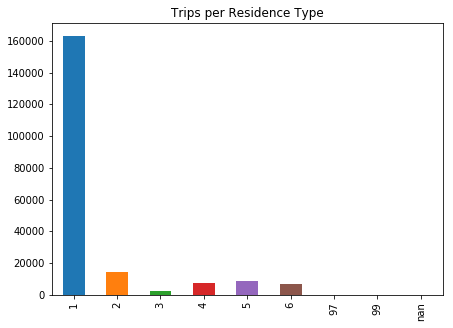

In [120]:
trip_counts_Series = pd.Series([162990, 14318, 2272, 7716, 9023, 7014, 51, 216, 60], index=['1','2','3','4','5','6','97','99','nan'])
trip_count_plot = trip_counts_Series.plot(kind='bar', title="Trips per Residence Type", figsize=(7,5))

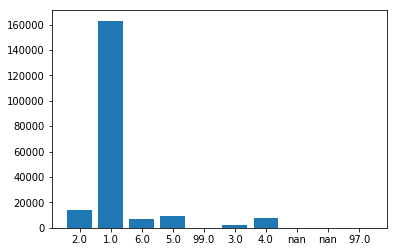

In [116]:
import matplotlib.pylab as plt



#D = {u'Label1':26, u'Label2': 17, u'Label3':30}

test_graph =  plt.bar(range(len(counts)), list(counts.values()), align='center')
aaa = plt.xticks(range(len(counts)), list(counts.keys()))